# 第三章 模型搭建和评估-评估
根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。  

加载下面的库

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

#加载数据并分割测试集和训练集
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
clear_data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = clear_data
y = train['Survived']

# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

E:\my_app\anoconda\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
E:\my_app\anoconda\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

模型评估
模型评估是为了知道模型的泛化能力。
- 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
- 在交叉验证中，数据被多次划分，并且需要训练多个模型。
- 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
- 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
- 召回率（recall）度量的是正类样本中有多少被预测为正类
- f-分数是准确率与召回率的调和平均  
【思考】：将上面的概念进一步的理解，大家可以做一下总结  
我个人大概理解为，对我们需要的数据集进行一定的泛化，使得模型对数据较为拟合，并且有一系列的指标去验证我们的模型是否正确或者说叫接近拟合

## 任务一：交叉验证   
用10折交叉验证来评估之前的逻辑回归模型  
计算交叉验证精度的平均值  
>先百度看看啥意思  
K折交叉验证(k-fold cross validation)：将数据集随机划分为 k 个大小相同或基本相同的子集，分别把每一个子集作为测试集，其余 k-1 个子集作为训练集，就得到了 k 组不同的训练、测试集，在这 k 组训练、测试集上训练并测试每一种模型，选择平均测试误差最小的模型；有时为了避免单次随机划分的特殊性，还会进行多次随机划分，将多个交叉验证的结果再进行一次平均；

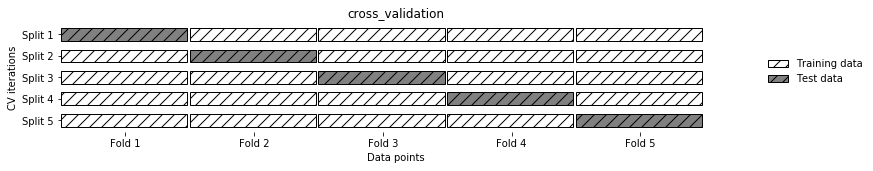

In [7]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

提示4  
交叉验证在sklearn中的模块为sklearn.model_selection

In [9]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

E:\my_app\anoconda\lib\site-packages\sklearn\model_selection\_split.py:618: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
E:\my_app\anoconda\lib\site-packages\sklearn\model_selection\_split.py:428: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

In [10]:
# k折交叉验证分数
scores

array([0.82352941, 0.77941176, 0.80597015, 0.82089552, 0.8358209 ,
       0.88059701, 0.72727273, 0.84848485, 0.75757576, 0.71212121])

In [11]:
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


思考4  
k折越多的情况下会带来什么样的影响？  
计算量应该会比较大，不过应该会对模型有一个更为准确的评估

## 任务二：混淆矩阵   
计算二分类问题的混淆矩阵  
计算精确率、召回率以及f-分数  
【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的  
  混淆矩阵也称误差矩阵，是表示精度评价的一种标准格式，用n行n列的矩阵形式来表示。

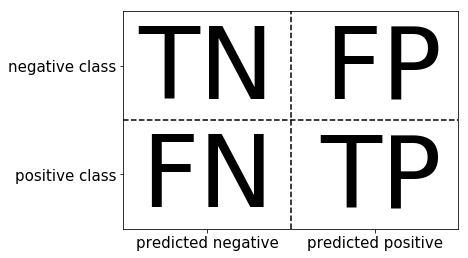

In [14]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

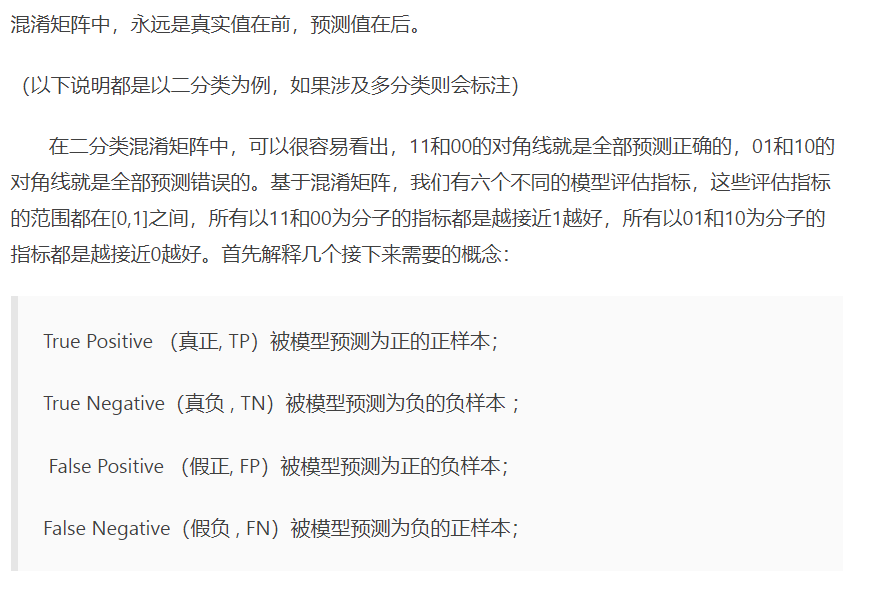

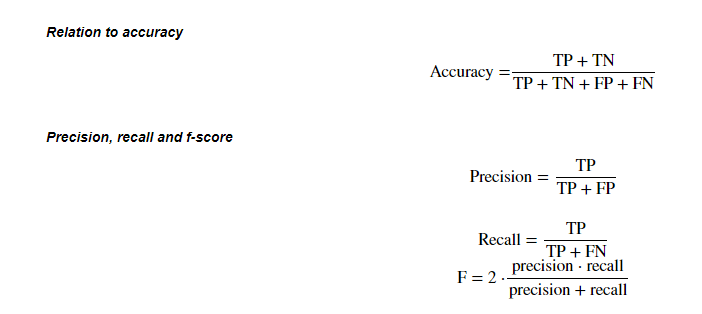

In [15]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

提示5 
- 混淆矩阵的方法在sklearn中的sklearn.metrics模块
- 混淆矩阵需要输入真实标签和预测标签
- 精确率、召回率以及f-分数可使用classification_report模块

In [17]:
from sklearn.metrics import confusion_matrix

# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# 模型预测结果
pred = lr.predict(X_train)

E:\my_app\anoconda\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [19]:
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[350,  62],
       [ 71, 185]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report

# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       412
          1       0.75      0.72      0.74       256

avg / total       0.80      0.80      0.80       668



【思考】  

如果自己实现混淆矩阵的时候该注意什么问题 

实在是找不到答案了┭┮﹏┭┮，回头再补充

## 任务三：ROC曲线    
绘制ROC曲线  
【思考】什么是ROC曲线，OCR曲线的存在是为了解决什么问题？
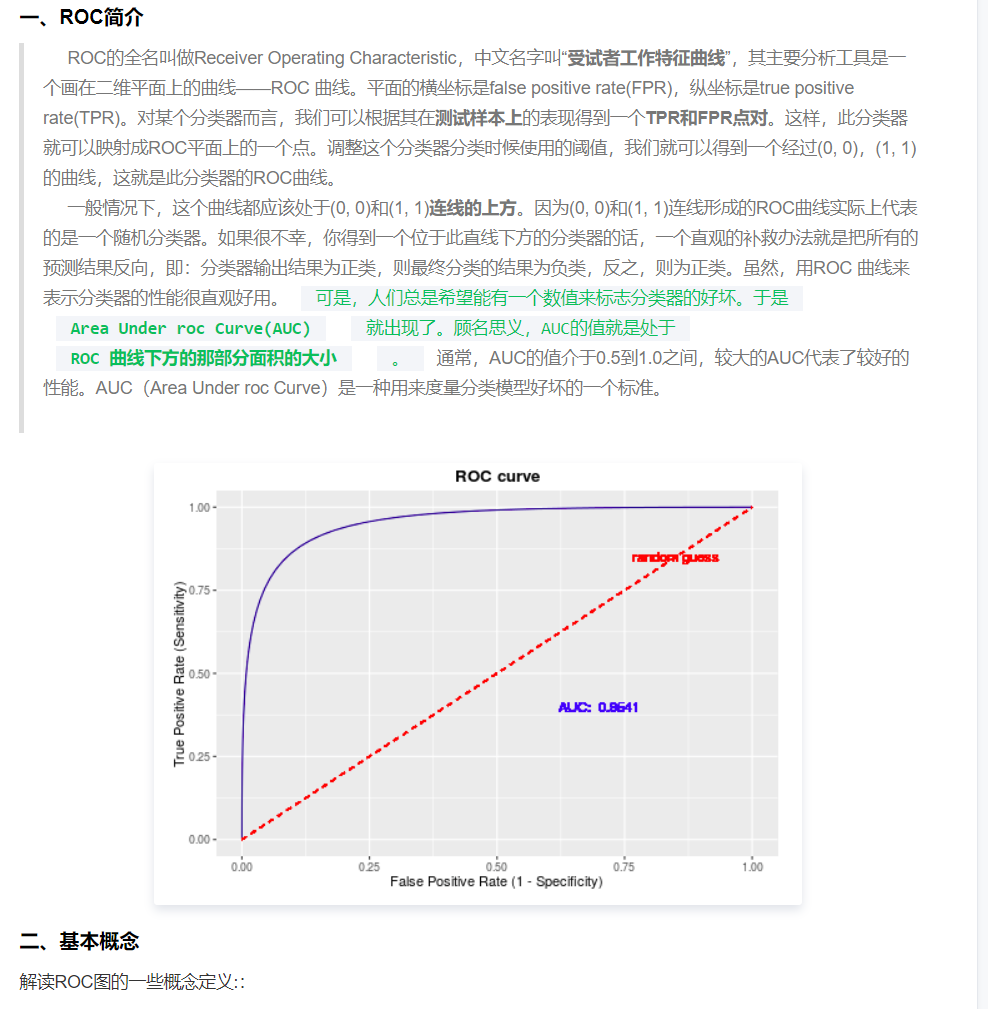

提示6  
ROC曲线在sklearn中的模块为sklearn.metrics  
ROC曲线下面所包围的面积越大越好  

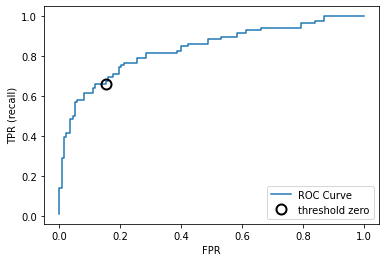

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

**思考6**  
对于多分类问题如何绘制ROC曲线  
康康别怎么写的  
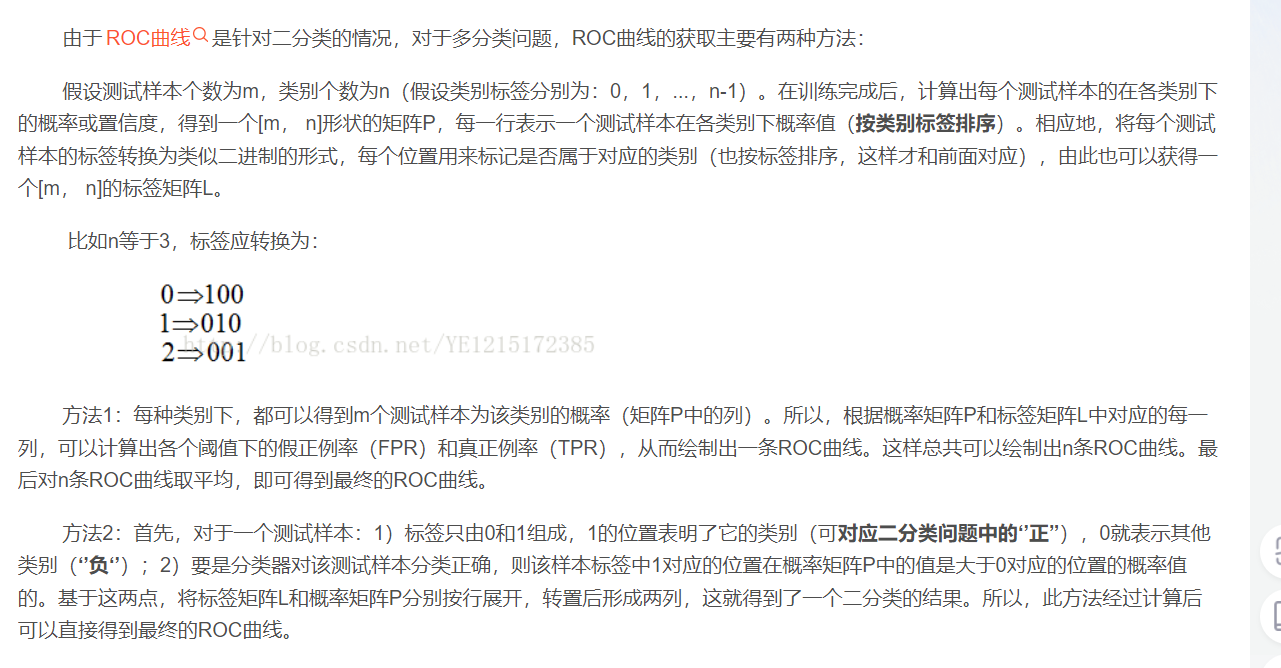

【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

理想目标：TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。
说明预测的效果还是不错的（maybe）